# 00 Environment

#### 👉Before you solve a Reinforcement Learning problem you need to define what are
- the actions
- the states of the world
- the rewards

#### 👉We are using the `Taxi-v3` environment from OpenAI's gym: https://gym.openai.com/envs/Taxi-v3/

#### 👉`Taxi-v3` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Load the environment 🌎

In [4]:
import gym
env = gym.make("Taxi-v3").env

## Action space

## State space

## Rewards

## Random agent 🤖🍷

In [5]:
class RandomAgent:
    """
    This taxi driver selects actions randomly.
    You better not get into this taxi!
    """
    def __init__(self, env):
        self.env = env

    def get_action(self, state) -> int:
        """
        No input arguments to this function.
        The agent does not consider the state of the environment when deciding
        what to do next.
        """
        return self.env.action_space.sample()

agent = RandomAgent(env)

## Let's evaluate this driver starting from a fixed `state = 198`

In [40]:
# set environment to illustration's state
state = 198
env.s = state

epochs = 0
penalties, reward = 0, 0

# we store each frame to latter plot them
frames = []

done = False

while not done:
    
    action = agent.get_action(state)
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 784
Penalties incurred: 243


In [41]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.01)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 784
State: 410
Action: 5
Reward: 20


#### Pretty bad driving, isn't it?

## Let's generate histograms to quantify performance

In [42]:
from tqdm import tqdm

n_episodes = 100

# For plotting metrics
timesteps_per_episode = []
penalties_per_episode = []

for i in tqdm(range(0, n_episodes)):
    
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        
        action = agent.get_action(state)       
        next_state, reward, done, info = env.step(action) 
               
        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

100%|███████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.25it/s]


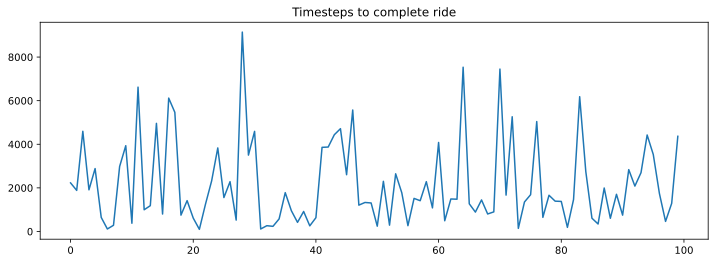

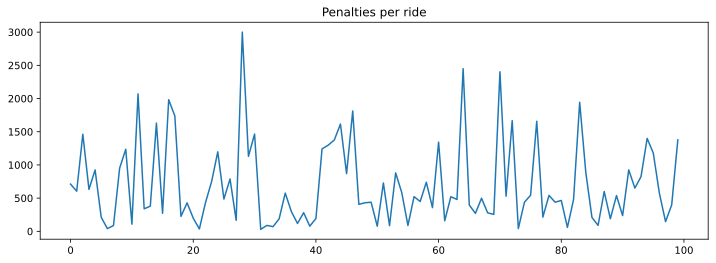

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()